In [1]:
import os
import logging
import pylab
import numpy as np
from pypelid.survey.observation import Survey
from pypelid.survey.mask import Mask
logging.basicConfig(level=logging.INFO)

/Users/ben/.virtualenvs/pypelid/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Mask initialization

In [2]:
config = {
    'vm_density': 10  # number of randoms per square degree
     }

The Survey class loads the survey definition file which lists the coordinates of the pointings.  We can also specify the dithering pattern.  In this case there is no dithering.

In [3]:
survey = Survey(config=config,
                survey_file='survey.dat', 
                dither_offsets=[0,0],
                dither_angles=[0],
                verbose=True,
               )

> Computing dither positions and orientations of 42749 fields.


A polygon mask is constructed from the list of pointings and we save it to a file.  This takes 1 min for the full survey file with 42749 pointings.

In [4]:
mask_file = 'mask_full.pickle'
if not os.path.exists(mask_file):
    mask = survey.survey_mask()  # this takes ~1 min for the full survey file
    mask.dump(mask_file)
else:
    mask = Mask()
    mask.load(mask_file)

INFO:pypelid.survey.mask:Loaded 683984 polygons
INFO:pypelid.survey.mask:Wrote data to file mask_full.pickle.  time=62.128996


# Draw random sky coordinates in the survey

Points will be drawn from the survey area.  We will sample in patches of sky defined by healpix cells with the following nside parameter.

In [5]:
nside = 2
pixel_list = np.arange(0,12*nside**2)

In [6]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import healpy as hp

sc = ScalarMappable(Normalize(0, len(pixel_list)), cmap='jet')
hp.mollview(np.zeros(12) + float('nan'), cbar=False, title="Random catalogue")

for cell in pixel_list:
    lon, lat = mask.draw_random_position(dens=config['vm_density'], cell=cell, nside=nside)
    
    c = sc.to_rgba(cell)
    hp.visufunc.projscatter(lon, lat, c=c, s=5., lw=0, lonlat=True)

/sw/lib/python2.7/site-packages/healpy/pixelfunc.py:267: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/sw/lib/python2.7/site-packages/numpy/ma/core.py:2249: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/sw/lib/python2.7/site-packages/healpy/projaxes.py:998: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/sw/lib/python2.7/site-packages/healpy/projaxes.py:999: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


In this plot the points in the random catalogue are colored by healpix cell.

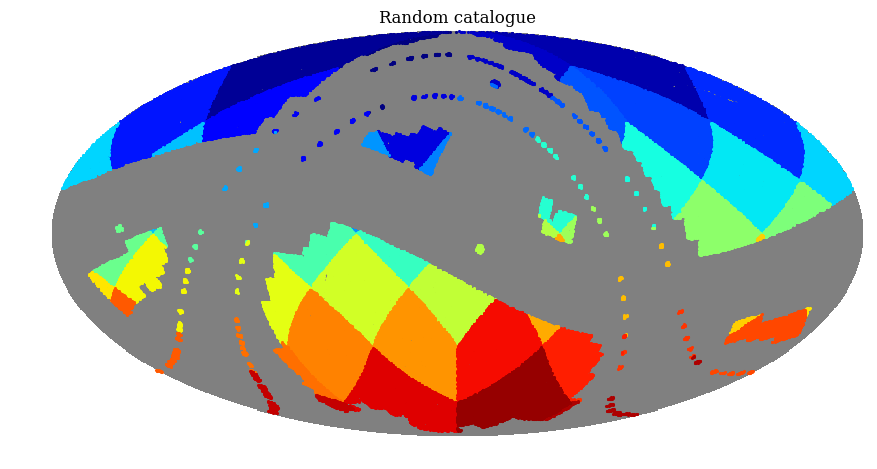

In [7]:
pylab.show()